In [1]:
"""
Read all the smartwatch meal data 

"""
%load_ext autoreload
%autoreload 2
from ema import read

feasibility_df = read.smartwatch_feasibility()

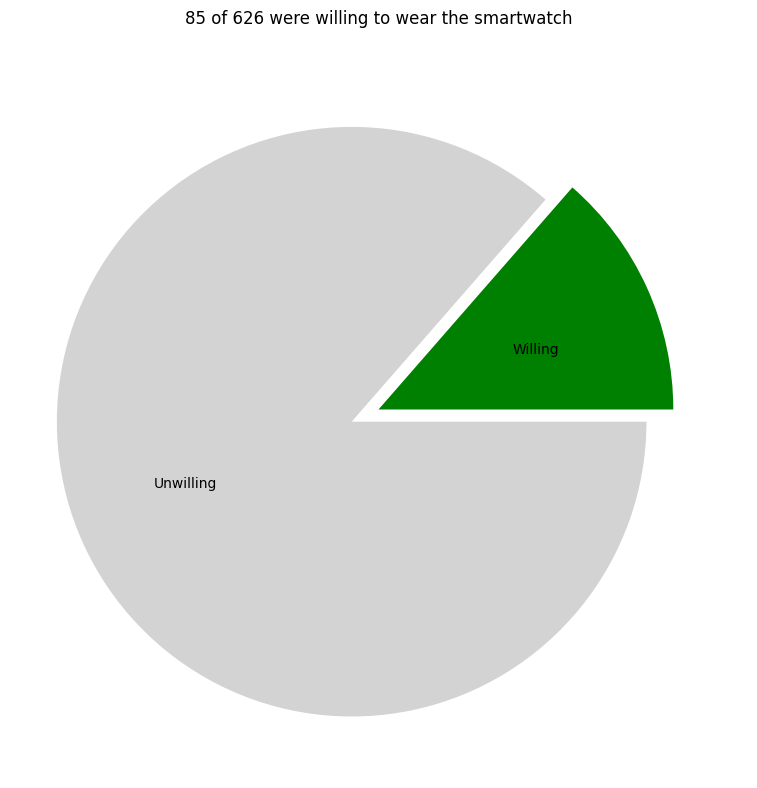

In [2]:
"""
Keep only the entries where participants were willing to wear the smartwatch

Plot a pie chart in the meantime

"""
import numpy as np
import matplotlib.pyplot as plt

accepted = feasibility_df["smartwatchwilling"] == 1
counts = [np.sum(accepted), len(accepted) - np.sum(accepted)]

# Guard against repeated running of this cell
assert counts[0] != len(
    accepted
), "All participants expected - has the df already been sliced?"

fig, axis = plt.subplots(figsize=(8, 8))
axis.pie(
    counts,
    explode=[0.0, 0.1],
    labels=["Willing", "Unwilling"],
    colors=["green", "lightgrey"],
    labeldistance=0.5,
)

fig.suptitle(
    f"{np.sum(accepted)} of {len(accepted)} were willing to wear the smartwatch"
)

fig.tight_layout()
fig.savefig("img/smartwatch_pie.png")

# Slice the df
feasibility_df = feasibility_df[accepted]